# Gaussian generative models for handwritten digit classification

Recall that the 1-NN classifier yielded a 3.09% test error rate on the MNIST data set of handwritten digits. We will now see that a Gaussian generative model does almost as well, while being significantly faster and more compact.

## 1. Set up notebook and load in data

As usual, we start by importing the required packages and data. For this notebook we will be using the *entire* `MNIST` dataset. The code below defines some helper functions that will load `MNIST` onto your computer.

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt 
import gzip, os, sys
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


if sys.version_info[0] == 2:
    from urllib import urlretrieve
else:
    from urllib.request import urlretrieve

In [2]:
## new download to get data from my repo
def download(filename):
    url = 'https://github.com/0tv0renakniga/dsc_255_hw3_minst_data/raw/main'
    file_url = f'{url}/{filename}'
    cmd = f'wget -O {filename} {file_url}'
    os.system(cmd)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data


Now load in the training set and test set

In [3]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

The function **displaychar** shows a single MNIST digit. To do this, it first has to reshape the 784-dimensional vector into a 28x28 image.

In [4]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

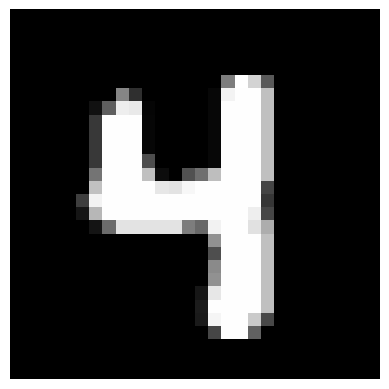

In [5]:
displaychar(train_data[58])

The training set consists of 60,000 images. Thus `train_data` should be a 60000x784 array while `train_labels` should be 60000x1. Let's check.

In [6]:
train_data.shape, train_labels.shape

((60000, 784), (60000,))

## 2. Fit a Gaussian generative model to the training data

**<font color="magenta">For you to do:</font>** Define a function, **fit_generative_model**, that takes as input a training set (data `x` and labels `y`) and fits a Gaussian generative model to it. It should return the parameters of this generative model; for each label `j = 0,1,...,9`, we have:
* `pi[j]`: the frequency of that label
* `mu[j]`: the 784-dimensional mean vector
* `sigma[j]`: the 784x784 covariance matrix

This means that `pi` is 10x1, `mu` is 10x784, and `sigma` is 10x784x784.

We have already seen how to fit a Gaussian generative model in the Winery example, but now there is an added ingredient. <font color="magenta">The empirical covariances are very likely to be singular (or close to singular), which means that we won't be able to do calculations with them</font>. Thus it is important to **regularize** these matrices. The standard way of doing this is to add `cI` to them, where `c` is some constant and `I` is the 784-dimensional identity matrix. (To put it another way, we compute the empirical covariances and then increase their diagonal entries by some constant `c`.)

This modification is guaranteed to yield covariance matrices that are non-singular, for any `c > 0`, no matter how small. But this doesn't mean that we should make `c` as small as possible. Indeed, `c` is now a parameter, and by setting it appropriately, we can improve the performance of the model. We will study **regularization** in greater detail over the coming weeks.

Your routine needs to choose a good setting of `c`. Crucially, this needs to be done using the training set alone. So you might try setting aside part of the training set as a validation set, or using some kind of cross-validation.

In [ ]:
"""
def fit_generative_model(x,y):

    Fit a generative model to the data

    classes = np.unique(y)
    mu = np.zeros((len(classes), x.shape[1]))
    sigma = np.zeros((len(classes), x.shape[1], x.shape[1]))
    pi = np.zeros(len(classes))
    
    for i, c in enumerate(classes):
        x_c = x[y == c]
        mu[i] = np.mean(x_c, axis=0)
        sigma[i] = np.cov(x_c, rowvar=False)
        pi[i] = len(x_c) / len(x)
        
    return mu, sigma, pi
    """

c = 0.0


/home/scotty/ucsd/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/scotty/ucsd/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/scotty/ucsd/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/scotty/ucsd/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  war

Validation Accuracy for c=0.0: 0.5461
c = 0.05
Validation Accuracy for c=0.05: 0.8015
c = 0.1
Validation Accuracy for c=0.1: 0.8127
c = 0.15000000000000002
Validation Accuracy for c=0.15000000000000002: 0.8218
c = 0.2
Validation Accuracy for c=0.2: 0.8295
c = 0.25
Validation Accuracy for c=0.25: 0.8353
c = 0.30000000000000004
Validation Accuracy for c=0.30000000000000004: 0.8392
c = 0.35000000000000003
Validation Accuracy for c=0.35000000000000003: 0.8454
c = 0.4
Validation Accuracy for c=0.4: 0.8504
c = 0.45
Validation Accuracy for c=0.45: 0.8537
c = 0.5
Validation Accuracy for c=0.5: 0.8578
c = 0.55
Validation Accuracy for c=0.55: 0.8611
c = 0.6000000000000001
Validation Accuracy for c=0.6000000000000001: 0.8633
c = 0.65
Validation Accuracy for c=0.65: 0.8659
c = 0.7000000000000001
Validation Accuracy for c=0.7000000000000001: 0.8675
c = 0.75
Validation Accuracy for c=0.75: 0.8700
c = 0.8
Validation Accuracy for c=0.8: 0.8698
c = 0.8500000000000001
Validation Accuracy for c=0.8500000

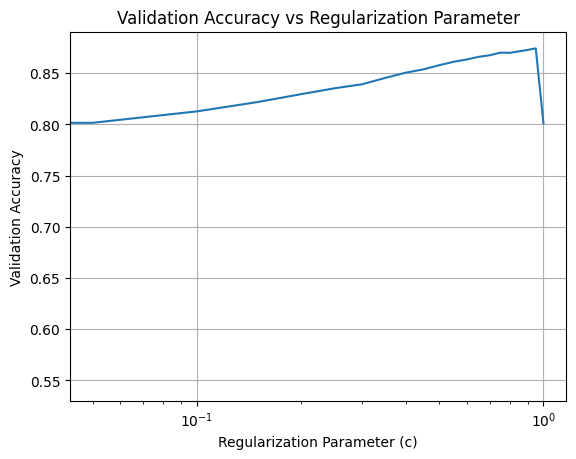

In [ ]:
def fit_generative_model(x,y,c):
    qda = QDA(store_covariance=True,reg_param=c)
    qda.fit(train_data, train_labels)
    mu = qda.means_
    sigma = np.stack(qda.covariance_)
    pi = qda.priors_

    return mu, sigma, pi

def my_fit_generative_model(x,y,c,accuracy):
    ## split the data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
    ## initialize the QDA model and fit it to the training data
    qda = QDA(store_covariance=True,reg_param=c)
    qda.fit(x_train, y_train)
    ## get the means, covariance matrices, and priors
    mu = qda.means_
    sigma = np.stack(qda.covariance_)
    pi = qda.priors_
    ## calculate the accuracy on the validation set
    val_accuracy = qda.score(x_val, y_val)
    print(f'Validation Accuracy for c={c}: {val_accuracy:.4f}')
    if accuracy:
        return val_accuracy
    else:
        return mu, sigma, pi
    return mu, sigma, pi

cvals = [i*0.05 for i in range(0, 21) if i*0.05 <= 1]
c_tests = {'c':[], 'accuracy':[]}
for c in cvals:
    print(f'c = {c}')
    acc = my_fit_generative_model(train_data, train_labels, c, accuracy=True)
    c_tests['c'].append(c)
    c_tests['accuracy'].append(acc)




{'c': [0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0], 'accuracy': [0.5460833333333334, 0.8015, 0.8126666666666666, 0.8218333333333333, 0.8295, 0.83525, 0.8391666666666666, 0.8454166666666667, 0.8504166666666667, 0.8536666666666667, 0.85775, 0.8610833333333333, 0.8633333333333333, 0.8659166666666667, 0.8675, 0.87, 0.8698333333333333, 0.8713333333333333, 0.8726666666666667, 0.87425, 0.8009166666666667]}


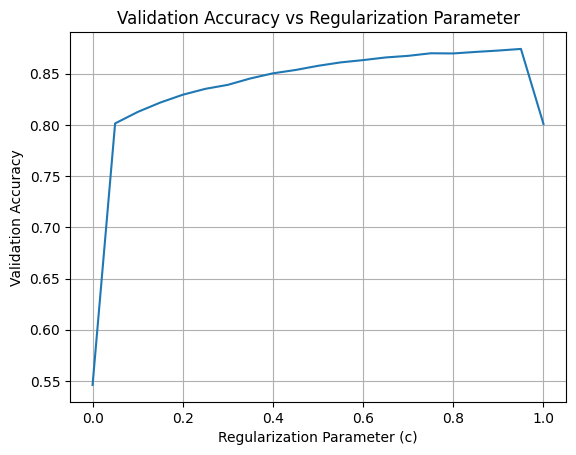

In [41]:
print(c_tests)
import pandas as pd
c_tests_df = pd.DataFrame(c_tests)
plt.plot(c_tests_df['c'], c_tests_df['accuracy'])
#plt.xscale('log')
plt.xlabel('Regularization Parameter (c)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Regularization Parameter')
plt.grid()
plt.show()

Okay, let's try out your function. In particular, we will use **displaychar** to visualize the means of the Gaussians for the first three digits. You can try the other digits on your own.

Validation Accuracy for c=0.95: 0.8742


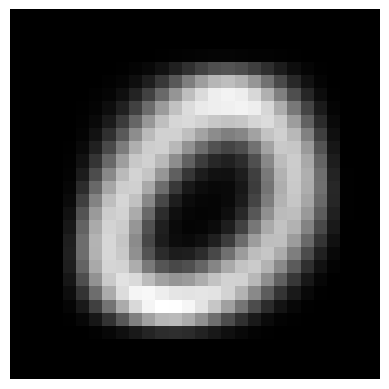

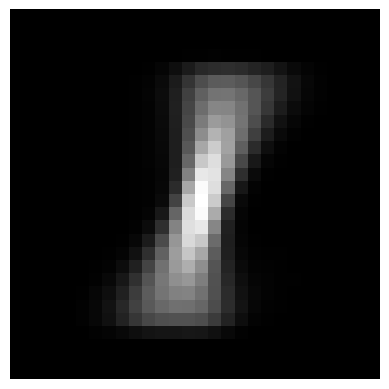

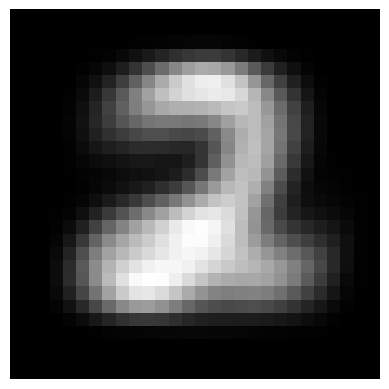

In [42]:
mu, sigma, pi = my_fit_generative_model(train_data, train_labels,0.95, accuracy=False)

displaychar(mu[0])
displaychar(mu[1])
displaychar(mu[2])

## 3. Make predictions on test data

Now let's see how many errors your model makes on the test set.

In [43]:
k=10
# Compute log Pr(label|image) for each [test image,label] pair.
score = np.zeros((len(test_labels),k))
for label in range(0,k):
    rv = multivariate_normal(mean=mu[label], cov=sigma[label])
    for i in range(0,len(test_labels)):
       score[i,label] = np.log(pi[label]) + rv.logpdf(test_data[i,:])
predictions = np.argmax(score, axis=1)
# Finally, tally up score
errors = np.sum(predictions != test_labels)
print("Your model makes " + str(errors) + " errors out of 10000")

Your model makes 1178 errors out of 10000


label is 5
training data is:
(784,)
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0462770691189558 0.07534856125778701 0.01053099970335212 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.012755858795609611 0.025215069712251556 0.045832097300504304 0.17279738949866508 0.29783447048353606 0.4078908335805399 0.24280628893503411 0.07134381489172352 0.026698309107089886 0.03752595668940967 0.008899436369029961 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.006229605458320973 0.0014832393948383269 0.0 0.0 0.0 0.004301394245031148 0.004894690002966479 0.05843963215663008 0.11287451794719668 0.20216552951646397 0.44156036784336994 1.2831504004746366 1.817413230495402 1.977751409077425 1.6201423909819044 1.328982497775141 1.018688816374963 0.7491842183328389 0.42583803025808364 0.26016018985464257 0.12948679916938594 0.021655295164639574 0.0

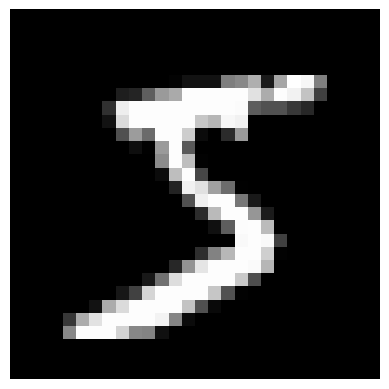

In [13]:
print(f'label is {train_labels[0]}')
print(f'training data is:')
print(train_data[0,:].shape)
rs = mu[1,:].reshape(28,28)
for i in range(28):
    for j in range(28):
        #print(rs[i,j], end=' ')
        if len(str(rs[i,j])) == 1:
            w = '  ' + str(rs[i,j])
            print(w, end=' ')
        elif len(str(rs[i,j])) == 2:
            w = ' ' + str(rs[i,j])
            print(w, end=' ')
        else:
            print(str(rs[i,j]), end=' ')
    print()
displaychar(train_data[0])


## 4. Quick exercises

*You will need to answer variants of these questions as part of this week's assignment*.

<font color="magenta">Exercise 1:</font> What happens if you do not regularize the covariance matrices?



<font color="magenta">Exercise 2:</font> What happens if you set the value of `c` too high, for instance to one billion? Do you understand why this happens?

<font color="magenta">Exercise 3:</font> What value of c did you end up using? How many errors did your model make on the training set?

<font color="magenta">If you have the time</font>: We have talked about using the same regularization constant `c` for all ten classes. What about using a different value of `c` for each class? How would you go about choosing these? Can you get better performance in this way?

In [16]:
def fit_generative_model(x,y,c,test_data,test_labels):
    k = 10  # labels 0,1,...,k-1
    d = (x.shape)[1]  # number of features
    mu = np.zeros((k,d))
    sigma = np.zeros((k,d,d))
    pi = np.zeros(k)
    ## calc priors, means, and covariances
    for j in range(k):
        indices = (y==j).flatten()
        x_j = x[indices]
        pi[j] = x_j.shape[0]/x.shape[0]
        mu[j] = np.mean(x_j, axis=0)
        sigma[j] = np.cov(x_j.T) + c*np.eye(d)  # add small value to diagonal for numerical stability
    # Compute log Pr(label|image) for each [test image,label] pair.
    score = np.zeros((len(test_labels),k))
    for label in range(0,k):
        try:
            rv = multivariate_normal(mean=mu[label], cov=sigma[label])
        except:
            print(f'Error in covariance matrix for label {label} with c={c}')
            continue
        for i in range(0,len(test_labels)):
            score[i,label] = np.log(pi[label]) + rv.logpdf(test_data[i,:])
    predictions = np.argmax(score, axis=1)
    # Finally, tally up score
    errors = np.sum(predictions != test_labels)
    print("Your model makes " + str(errors) + " errors out of 10000 for c = " + str(c))
    # Halt and return parameters
    #return mu, sigma, pi

c_values = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for c in c_values:
    fit_generative_model(train_data, train_labels, c, test_data, test_labels)


Error in covariance matrix for label 0 with c=0.0001
Error in covariance matrix for label 1 with c=0.0001
Error in covariance matrix for label 5 with c=0.0001
Error in covariance matrix for label 6 with c=0.0001
Your model makes 9020 errors out of 10000 for c = 0.0001
Your model makes 2468 errors out of 10000 for c = 0.001
Your model makes 2191 errors out of 10000 for c = 0.01
Your model makes 1891 errors out of 10000 for c = 0.1
Your model makes 1588 errors out of 10000 for c = 1
Your model makes 1226 errors out of 10000 for c = 10
Your model makes 806 errors out of 10000 for c = 100
Your model makes 489 errors out of 10000 for c = 1000
Your model makes 508 errors out of 10000 for c = 10000


In [27]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

k = 10  # labels 0,1,...,k-1
d = (train_data.shape)[1]  # number of features
pi = np.zeros(k)
## calc priors, means, and covariances
for j in range(k):
    indices = (train_labels==j).flatten()
    x_j = train_data[indices]
    x = train_data[train_labels==j]
    pi[j] = x_j.shape[0]/x.shape[0]
c_values = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for c in c_values:
    qda = QDA(priors=pi,reg_param=c)
    qda.fit(train_data, train_labels)
    y_pred = qda.predict(test_data)
    print(f'Accuracy for c = {c}: {accuracy_score(test_labels, y_pred)}')
#print(f'Confusion Matrix: {confusion_matrix(test_labels, y_pred)}')
#print(f'Classification Report: {classification_report(test_labels, y_pred)}')
#disp = ConfusionMatrixDisplay(confusion_matrix(test_labels, y_pred), display_labels=qda.classes_)
#disp.plot(cmap=plt.cm.Blues)
#plt.show()
'''
lda = LDA()
lda.fit(train_data, train_labels)
y_pred = lda.predict(test_data)
print(f'Accuracy: {accuracy_score(test_labels, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(test_labels, y_pred)}')
print(f'Classification Report: {classification_report(test_labels, y_pred)}')
disp = ConfusionMatrixDisplay(confusion_matrix(test_labels, y_pred), display_labels=lda.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()
'''

/home/scotty/ucsd/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/scotty/ucsd/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/scotty/ucsd/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/scotty/ucsd/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  war

Accuracy for c = 0.0001: 0.7283
Accuracy for c = 0.001: 0.7532
Accuracy for c = 0.01: 0.7825
Accuracy for c = 0.1: 0.8208
Accuracy for c = 1: 0.8203


InvalidParameterError: The 'reg_param' parameter of QuadraticDiscriminantAnalysis must be a float in the range [0.0, 1.0]. Got 10 instead.

Accuracy: 0.5558
Confusion Matrix: [[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.9

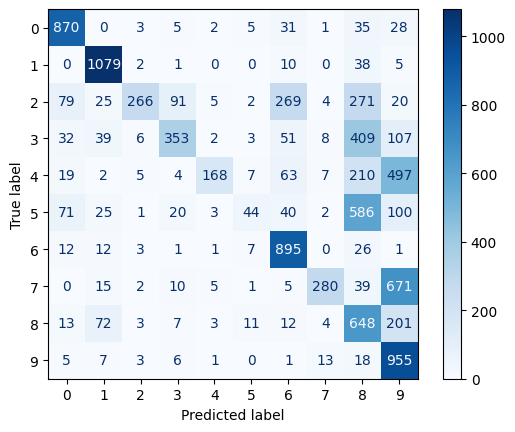

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_data, train_labels)
y_pred = gnb.predict(test_data)
print(f'Accuracy: {accuracy_score(test_labels, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(test_labels, y_pred)}')
print(f'Classification Report: {classification_report(test_labels, y_pred)}')
disp = ConfusionMatrixDisplay(confusion_matrix(test_labels, y_pred), display_labels=gnb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

{'var_smoothing': np.float64(0.08111308307896889)}
0.8006333333333334
Accuracy: 0.8153
Confusion Matrix: [[ 902    0    0    4    1   12   20    1   36    4]
 [   0 1096    1    4    0    0    6    0   28    0]
 [  15   37  778   30    9    5   59   14   79    6]
 [   6   37   26  813    0   18   14   11   43   42]
 [   4    6    5    0  640    4   22    0   19  282]
 [  20   28    7   94   22  573   23   11   64   50]
 [  12   22   11    1    8   22  868    0   13    1]
 [   1   38    8    4   20    0    1  839   25   92]
 [   7   67    8   37   11   17   12    4  742   69]
 [   6   17    3    9   38    1    0   15   18  902]]
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.92      0.92       980
           1       0.81      0.97      0.88      1135
           2       0.92      0.75      0.83      1032
           3       0.82      0.80      0.81      1010
           4       0.85      0.65      0.74       982
           5    

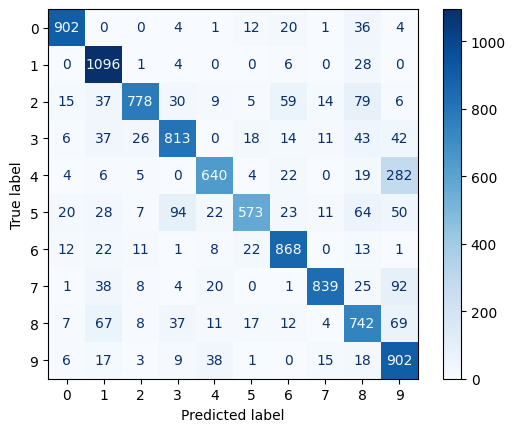

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Define the parameter grid
param_grid = {'var_smoothing': np.logspace(-10, -1, num=100)}

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Create a GridSearchCV object
grid_search = GridSearchCV(gnb, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(train_data, train_labels)

# Print the best parameter value
print(grid_search.best_params_)

# Print the best score
print(grid_search.best_score_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(test_data)
print(f'Accuracy: {accuracy_score(test_labels, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(test_labels, y_pred)}')
print(f'Classification Report: {classification_report(test_labels, y_pred)}')
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(test_labels, y_pred), display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()